In [35]:
import tensorflow as tf
!pip install tensorflow_datasets
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing import image



In [2]:
print(f"Number of dataset is {len(tfds.list_builders())}")

2023-04-13 15:03:09.272507: W tensorflow/core/platform/cloud/google_auth_provider.cc:184] All attempts to get a Google authentication bearer token failed, returning an empty token. Retrieving token from files failed with "NOT_FOUND: Could not locate the credentials file.". Retrieving token from GCE failed with "FAILED_PRECONDITION: Error executing an HTTP request: libcurl code 6 meaning 'Couldn't resolve host name', error details: Could not resolve host: metadata".


Number of dataset is 1138


In [3]:
tfds.list_builders()

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'amazon_us_reviews',
 'anli',
 'answer_equivalence',
 'arc',
 'asqa',
 'asset',
 'assin2',
 'bair_robot_pushing_small',
 'bccd',
 'beans',
 'bee_dataset',
 'beir',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'ble_wind_field',
 'blimp',
 'booksum',
 'bool_q',
 'bucc',
 'c4',
 'c4_wsrs',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cardiotox',
 'cars196',
 'cassava',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'cfq',
 'cherry_blossoms',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar100_n',
 'cifar10_1',
 'cifar10_corrupted',
 'cifar10_n',
 'citrus_leaves',
 'cityscapes',
 'civil_comments',
 'clevr',
 'clic',
 'clinc_oos',
 'cmaterdb',
 'cnn_dailymail',
 'coco',
 'coco_captions',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'common_voice',
 'conll2002',
 'conll2003',
 'controlled_noisy_web_labels'

In [102]:
(X_train,y_train),(X_test,y_test) =tf.keras.datasets.cifar10.load_data()

In [103]:
print(f"X_train dimension {X_train.shape}")
print(f"X_test dimension {X_test.shape}")
print(f"y_train dimension {y_train.shape}")
print(f"y_test dimension {y_test.shape}")

X_train dimension (50000, 32, 32, 3)
X_test dimension (10000, 32, 32, 3)
y_train dimension (50000, 1)
y_test dimension (10000, 1)


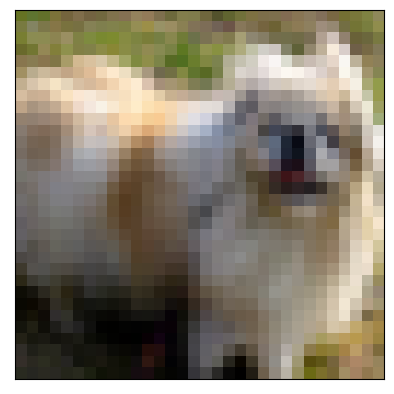

In [104]:
import matplotlib.pyplot as plt

plt.imshow(X_train[40])
plt.xticks([])
plt.yticks([])
plt.show()

In [105]:
from sklearn.model_selection import train_test_split

x_train,x_val ,y_train,y_val = train_test_split(X_train,y_train,test_size=0.05)
x_train.shape,x_val.shape

((47500, 32, 32, 3), (2500, 32, 32, 3))

In [107]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_gen  = ImageDataGenerator(horizontal_flip=True,rotation_range=15,width_shift_range=0.1,height_shift_range=0.1)

In [108]:
def normalize(data):
    data = data.astype('float32')
    data = data/255.0 
    return data

In [109]:
x_train = normalize(x_train)
data_gen.fit(x_train)
x_val = normalize(x_val)
data_gen.fit(x_val)
X_test = normalize(X_test)

In [110]:
y_train = tf.keras.utils.to_categorical(y_train,10)
y_test= tf.keras.utils.to_categorical(y_test,10)
y_val = tf.keras.utils.to_categorical(y_val,10)

In [12]:
y_train

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [13]:
print("x_train dimensions : ",x_train.shape)
print("y_train dimensions : ",y_train.shape)

x_train dimensions :  (47500, 32, 32, 3)
y_train dimensions :  (47500, 10)


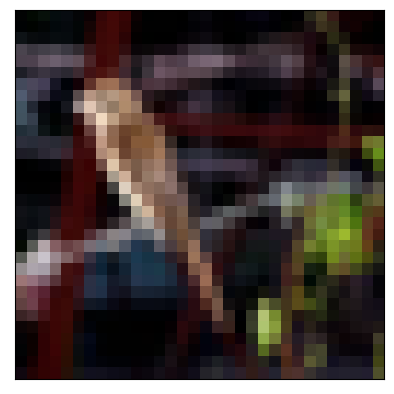

In [14]:
plt.imshow(x_train[40])
plt.xticks([])
plt.yticks([])
plt.show()

In [15]:
def result(model):
    epochs=20
    r = model.fit(x_train,y_train,batch_size=32,epochs=epochs,validation_data=[x_val,y_val],verbose=1)
    
    acc = model.evaluate(X_test,y_test)
    print(f"Test set loss : {acc[0]}")
    print(f"Test set accuracy : {acc[1] * 100}")
    
    epoch_range = range(1,epochs+1)
    plt.plot(epoch_range,r.history['accuracy'])
    plt.plot(epoch_range,r.history['val_accuracy'])
    plt.title('Classification Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(['Train','Validation'], loc='lower right')
    plt.show()
    
    
    epoch_range = range(1,epochs+1)
    plt.plot(epoch_range,r.history['loss'])
    plt.plot(epoch_range,r.history['val_loss'])
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(['Train','Validation'], loc='lower right')
    plt.show()
    

In [16]:
classes = ['airplane','automobile', 'bird', 'cat',
           'deer','dog','frog', 'horse','ship','truck']

In [66]:
def predict_class(filename,model):
    from tensorflow.keras.preprocessing import image


    img = image.load_img(filename,target_size=(32,32))
    plt.imshow(img)
    
    img = image.img_to_array(img)
    img= img.reshape(1,32,32,3)
    img = img.astype('float32')
    img = img/255
    
    result = model.predict(img)
    print(result)
    dict2 = {}
    for i in range(10):
        dict2[result[0][i]] = classes[i]
    res = result[0]
    res.sort()
    res =res[::-1]
    result = res[:3]
    print(dict2[result[1]])
    print("Top prediction of these image are")
    for i in range(3):
        print("{} : {}".format(dict2[result[i]],(result[i]*100).round(2)))
    print("The image given as input is")

In [62]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',padding='same',input_shape=(32,32,3)),
    tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128,activation='relu'),
    tf.keras.layers.Dense(units=10,activation='softmax')
])

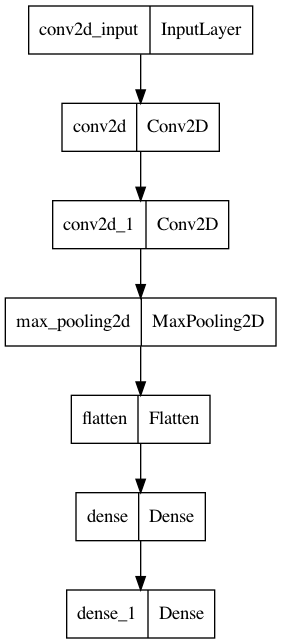

In [19]:
from tensorflow.keras.utils import plot_model
plot_model(model_1,to_file='model1.png')

In [20]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 128)               1048704   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

/Users/ngounepeetprogress/opt/anaconda3/envs/deepL/lib/python3.7/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/20
1485/1485 [==============================] - 63s 42ms/step - loss: 1.8979 - accuracy: 0.3174 - val_loss: 1.6883 - val_accuracy: 0.4036
Epoch 2/20
1485/1485 [==============================] - 63s 42ms/step - loss: 1.4998 - accuracy: 0.4695 - val_loss: 1.3848 - val_accuracy: 0.5016
Epoch 3/20
1485/1485 [==============================] - 62s 42ms/step - loss: 1.2913 - accuracy: 0.5439 - val_loss: 1.2638 - val_accuracy: 0.5436
Epoch 4/20
1485/1485 [==============================] - 66s 45ms/step - loss: 1.1807 - accuracy: 0.5825 - val_loss: 1.2328 - val_accuracy: 0.5648
Epoch 5/20
1485/1485 [==============================] - 75s 50ms/step - loss: 1.0863 - accuracy: 0.6196 - val_loss: 1.1361 - val_accuracy: 0.5884
Epoch 6/20
1485/1485 [==============================] - 80s 54ms/step - loss: 1.0059 - accuracy: 0.6485 - val_loss: 1.0871 - val_accuracy: 0.6176
Epoch 7/20
1485/1485 [==============================] - 83s 56ms/step - loss: 0.9314 - accuracy: 0.6742 - val_loss: 1.0684 -

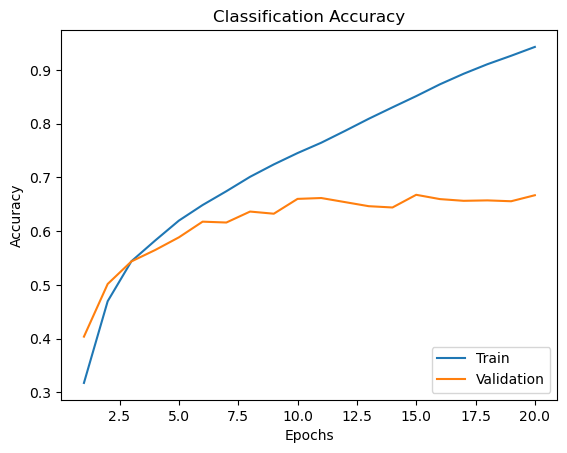

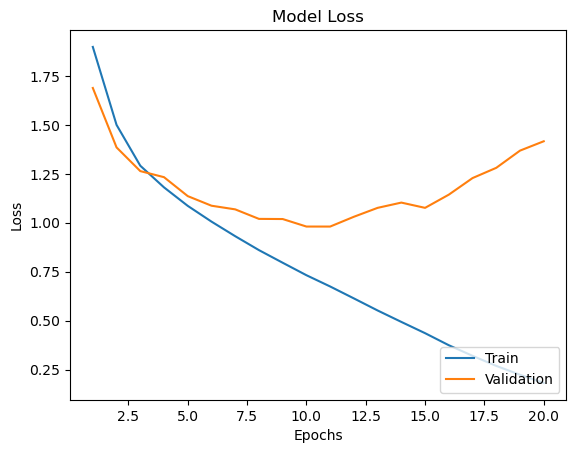

In [64]:
opt = tf.keras.optimizers.SGD(lr=0.001,momentum=0.9)
model_1.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
result(model_1)

1/1 [==============================] - 0s 23ms/step
[[9.9999940e-01 6.0254695e-07 5.7799462e-14 3.9779052e-12 2.8925550e-16
  6.3810417e-16 1.6917346e-11 6.4567978e-17 6.8607186e-13 2.6265674e-09]]
automobile
Top prediction of these image are
airplane : 100.0
automobile : 0.0
truck : 0.0
The image given as input is


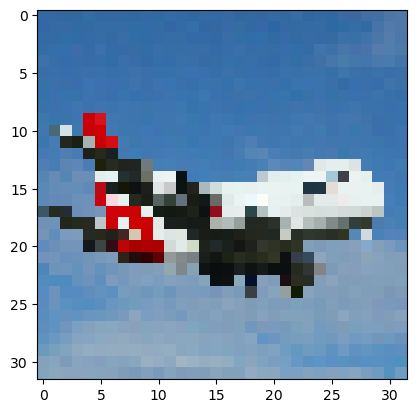

In [67]:
# im = image.load_img('test.jpg',target_size=(32,32))
# # plt.imshow(image)


predict_class('test.jpg',model_1)

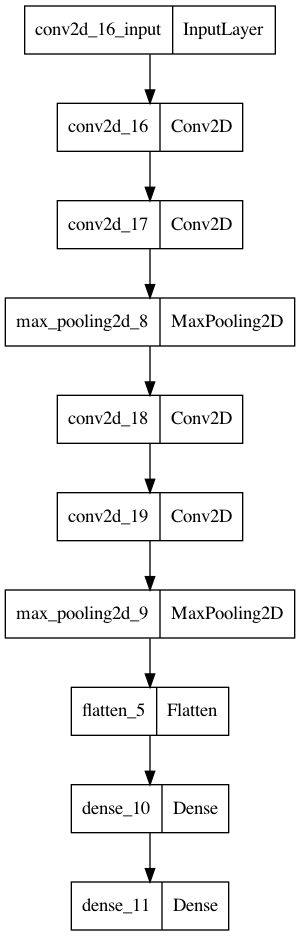

In [73]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu',input_shape=(32,32,3)),
    tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'),
    tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128,activation='relu'),
    tf.keras.layers.Dense(units=10,activation='softmax')
])

opt = tf.keras.optimizers.SGD(learning_rate=0.001 ,momentum=0.9)

model_2.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])

tf.keras.utils.plot_model(model_2,to_file='model_2.png')


Epoch 1/20
1485/1485 [==============================] - 180s 121ms/step - loss: 1.9607 - accuracy: 0.2920 - val_loss: 1.6699 - val_accuracy: 0.3960
Epoch 2/20
1485/1485 [==============================] - 191s 128ms/step - loss: 1.5283 - accuracy: 0.4580 - val_loss: 1.4254 - val_accuracy: 0.4892
Epoch 3/20
1485/1485 [==============================] - 191s 128ms/step - loss: 1.2960 - accuracy: 0.5393 - val_loss: 1.2626 - val_accuracy: 0.5468
Epoch 4/20
1485/1485 [==============================] - 172s 116ms/step - loss: 1.1457 - accuracy: 0.5954 - val_loss: 1.1409 - val_accuracy: 0.5988
Epoch 5/20
1485/1485 [==============================] - 161s 108ms/step - loss: 1.0221 - accuracy: 0.6388 - val_loss: 1.0615 - val_accuracy: 0.6256
Epoch 6/20
1485/1485 [==============================] - 160s 108ms/step - loss: 0.9308 - accuracy: 0.6763 - val_loss: 1.0185 - val_accuracy: 0.6424
Epoch 7/20
1485/1485 [==============================] - 182s 122ms/step - loss: 0.8495 - accuracy: 0.7036 - val_

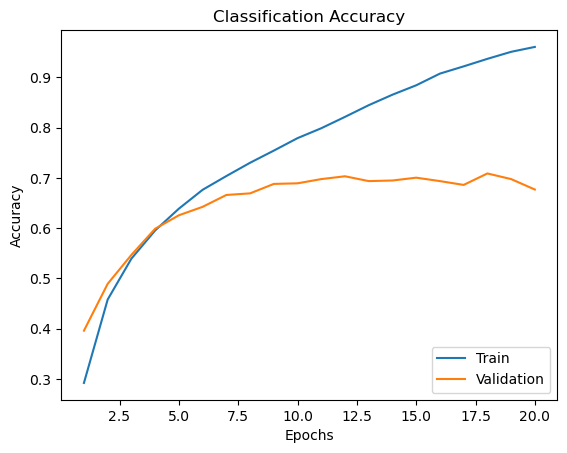

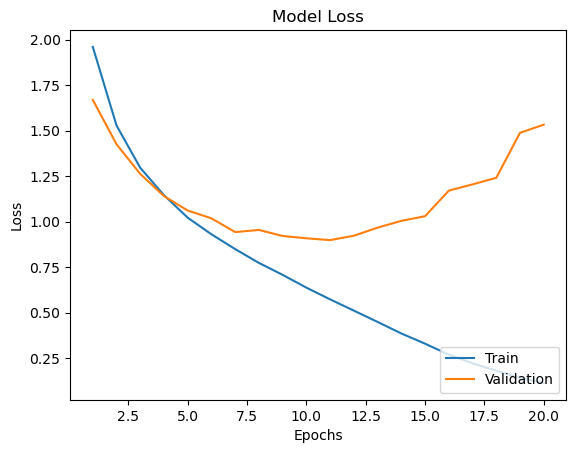

In [74]:
result(model_2)

1/1 [==============================] - 0s 23ms/step
[[9.9999940e-01 6.0254695e-07 5.7799462e-14 3.9779052e-12 2.8925550e-16
  6.3810417e-16 1.6917346e-11 6.4567978e-17 6.8607186e-13 2.6265674e-09]]
automobile
Top prediction of these image are
airplane : 100.0
automobile : 0.0
truck : 0.0
The image given as input is


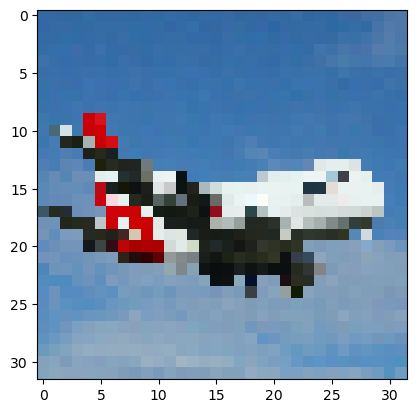

In [75]:
predict_class('test.jpg',model_1)

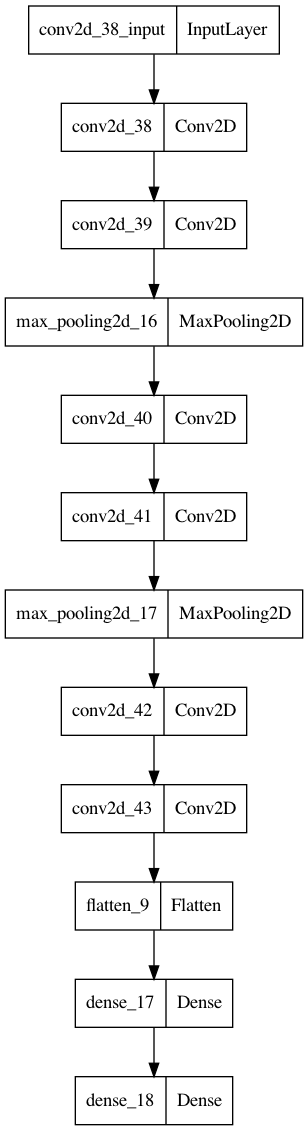

In [82]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu',input_shape=(32,32,3)),
    tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'),
    tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu'),
    tf.keras.layers.Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128,activation='relu'),
    tf.keras.layers.Dense(units=10,activation='softmax')
])
opt = tf.keras.optimizers.SGD(learning_rate=0.001,momentum=0.9)
model_3.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
tf.keras.utils.plot_model(model_3,to_file='model_3.png')

Epoch 1/20
1485/1485 [==============================] - 141s 95ms/step - loss: 2.0552 - accuracy: 0.2381 - val_loss: 1.8048 - val_accuracy: 0.3384
Epoch 2/20
1485/1485 [==============================] - 143s 96ms/step - loss: 1.5985 - accuracy: 0.4237 - val_loss: 1.4545 - val_accuracy: 0.4772
Epoch 3/20
1485/1485 [==============================] - 147s 99ms/step - loss: 1.3976 - accuracy: 0.4985 - val_loss: 1.3605 - val_accuracy: 0.5156
Epoch 4/20
1485/1485 [==============================] - 166s 112ms/step - loss: 1.2431 - accuracy: 0.5568 - val_loss: 1.2960 - val_accuracy: 0.5412
Epoch 5/20
1485/1485 [==============================] - 172s 115ms/step - loss: 1.1194 - accuracy: 0.6061 - val_loss: 1.1633 - val_accuracy: 0.5880
Epoch 6/20
1485/1485 [==============================] - 171s 115ms/step - loss: 1.0051 - accuracy: 0.6438 - val_loss: 1.0686 - val_accuracy: 0.6164
Epoch 7/20
1485/1485 [==============================] - 183s 123ms/step - loss: 0.9015 - accuracy: 0.6856 - val_los

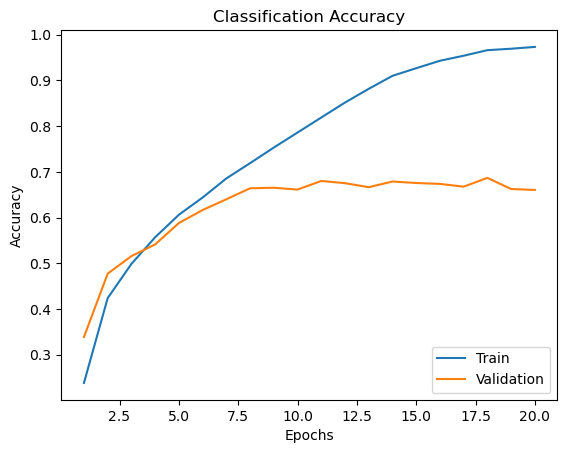

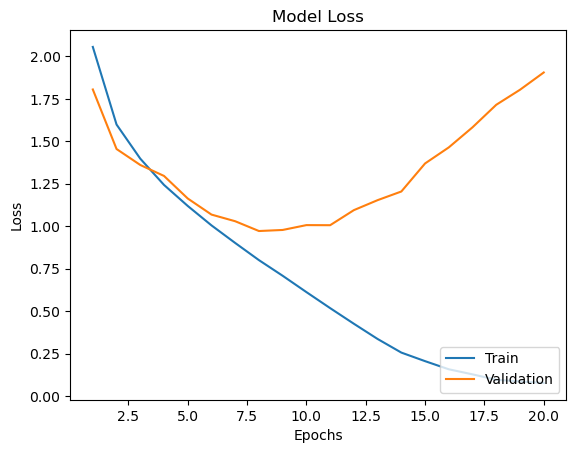

In [83]:
result(model_3)

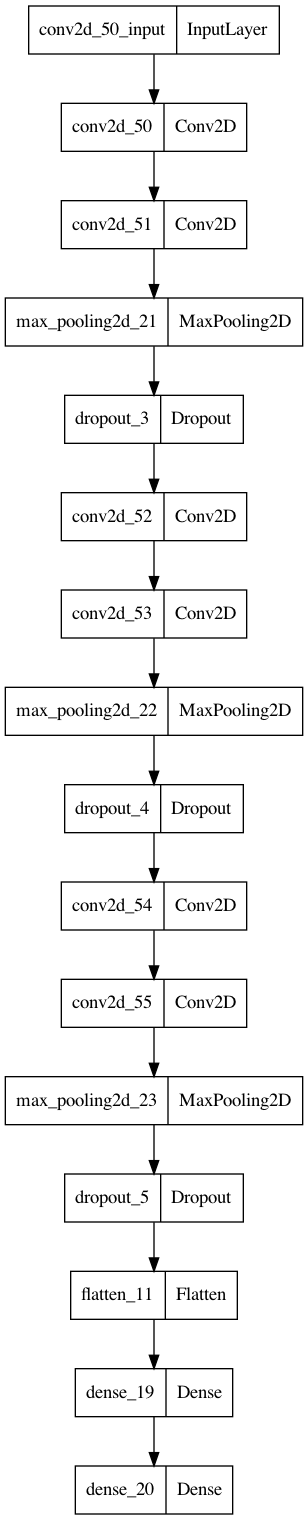

In [87]:
model_4 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3),padding='same',kernel_initializer='he_uniform'),
    tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',padding='same',kernel_initializer='he_uniform'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same',kernel_initializer='he_uniform'),
    tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same',kernel_initializer='he_uniform'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(filters=128,kernel_size=(3,3),activation='relu',padding='same',kernel_initializer='he_uniform'),
    tf.keras.layers.Conv2D(filters=128,kernel_size=(3,3),activation='relu',padding='same',kernel_initializer='he_uniform'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128,activation='relu'),
    tf.keras.layers.Dense(units=10,activation='softmax')
])
opt = tf.keras.optimizers.SGD(learning_rate=0.001,momentum=0.9)
model_4.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
tf.keras.utils.plot_model(model_4,'model_4.png')

Epoch 1/20
1485/1485 [==============================] - 198s 133ms/step - loss: 1.9498 - accuracy: 0.2787 - val_loss: 1.6804 - val_accuracy: 0.3892
Epoch 2/20
1485/1485 [==============================] - 235s 158ms/step - loss: 1.5830 - accuracy: 0.4194 - val_loss: 1.4452 - val_accuracy: 0.4692
Epoch 3/20
1485/1485 [==============================] - 162s 109ms/step - loss: 1.4186 - accuracy: 0.4836 - val_loss: 1.2980 - val_accuracy: 0.5276
Epoch 4/20
1485/1485 [==============================] - 163s 110ms/step - loss: 1.2934 - accuracy: 0.5330 - val_loss: 1.1922 - val_accuracy: 0.5748
Epoch 5/20
1485/1485 [==============================] - 173s 116ms/step - loss: 1.1842 - accuracy: 0.5779 - val_loss: 1.0714 - val_accuracy: 0.6128
Epoch 6/20
1485/1485 [==============================] - 176s 119ms/step - loss: 1.0949 - accuracy: 0.6113 - val_loss: 0.9893 - val_accuracy: 0.6524
Epoch 7/20
1485/1485 [==============================] - 173s 117ms/step - loss: 1.0134 - accuracy: 0.6414 - val_

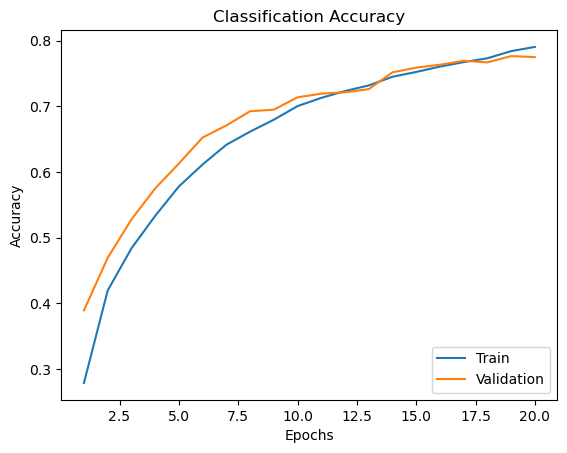

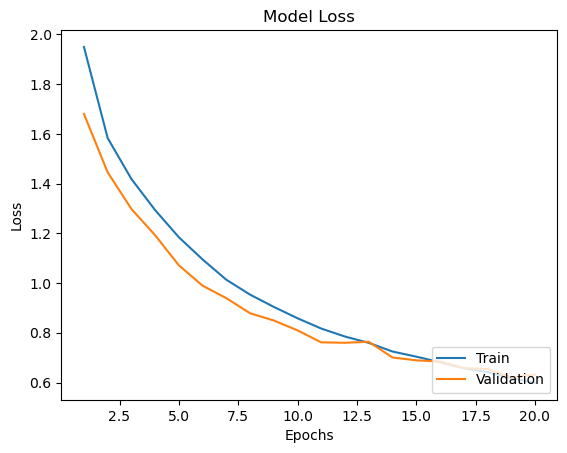

In [88]:
result(model_4)

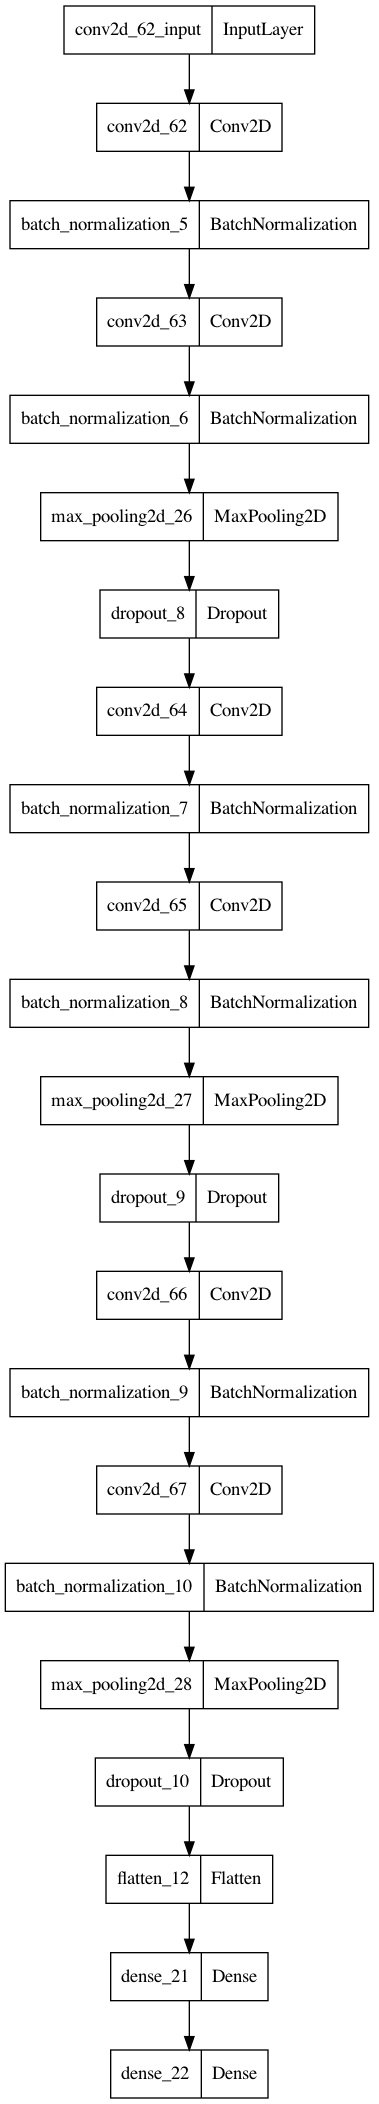

In [91]:
weight_decay = 1e-4
model_5 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3),padding='same',kernel_regularizer=tf.keras.regularizers.l2(weight_decay)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',padding='same',kernel_regularizer=tf.keras.regularizers.l2(weight_decay)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same',kernel_regularizer=tf.keras.regularizers.l2(weight_decay)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same',kernel_regularizer=tf.keras.regularizers.l2(weight_decay)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D(filters=128,kernel_size=(3,3),activation='relu',padding='same',kernel_regularizer=tf.keras.regularizers.l2(weight_decay)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=128,kernel_size=(3,3),activation='relu',padding='same',kernel_regularizer=tf.keras.regularizers.l2(weight_decay)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128,activation='relu'),
    tf.keras.layers.Dense(units=10,activation='softmax')
])

opt = tf.keras.optimizers.SGD(learning_rate=0.001,momentum=0.9)
model_5.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])

tf.keras.utils.plot_model(model_5,'model_5.png')

Epoch 1/20
1485/1485 [==============================] - 169s 113ms/step - loss: 1.6041 - accuracy: 0.4335 - val_loss: 1.2650 - val_accuracy: 0.5576
Epoch 2/20
1485/1485 [==============================] - 230s 155ms/step - loss: 1.2527 - accuracy: 0.5630 - val_loss: 1.1151 - val_accuracy: 0.6148
Epoch 3/20
1485/1485 [==============================] - 221s 149ms/step - loss: 1.0790 - accuracy: 0.6301 - val_loss: 1.0840 - val_accuracy: 0.6340
Epoch 4/20
1485/1485 [==============================] - 214s 144ms/step - loss: 0.9571 - accuracy: 0.6735 - val_loss: 0.8783 - val_accuracy: 0.6996
Epoch 5/20
1485/1485 [==============================] - 226s 152ms/step - loss: 0.8756 - accuracy: 0.7023 - val_loss: 0.8427 - val_accuracy: 0.7064
Epoch 6/20
1485/1485 [==============================] - 218s 147ms/step - loss: 0.8118 - accuracy: 0.7256 - val_loss: 0.8550 - val_accuracy: 0.7092
Epoch 7/20
1485/1485 [==============================] - 215s 145ms/step - loss: 0.7618 - accuracy: 0.7440 - val_

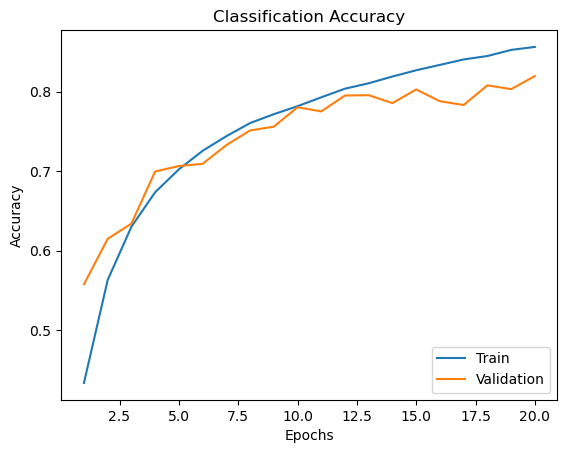

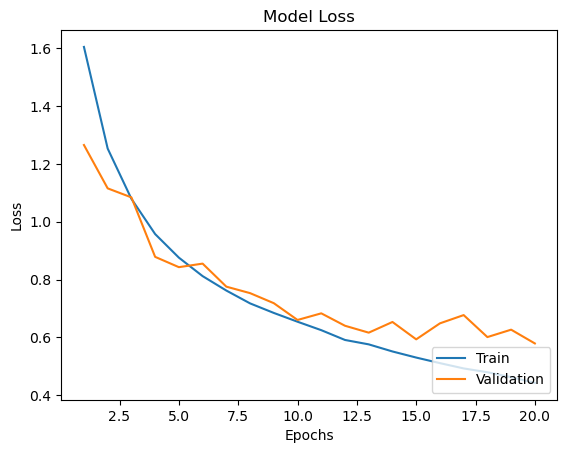

In [92]:
result(model_5)

In [93]:
model_5.save('model_5.h5')

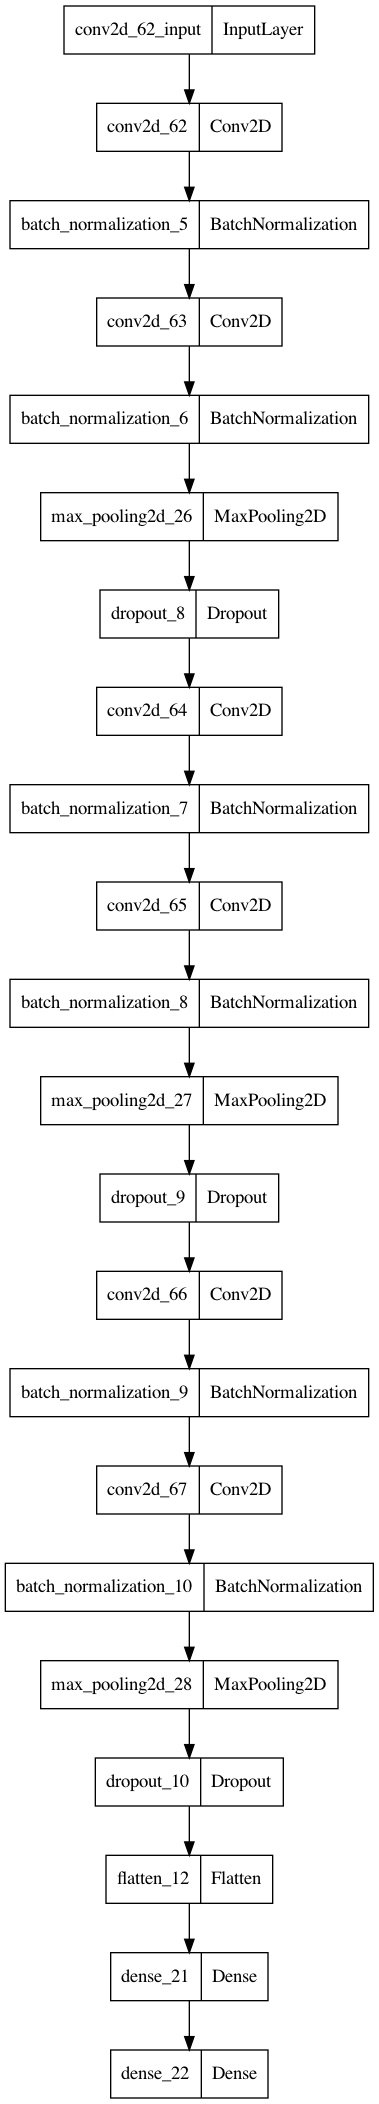

In [94]:
m = tf.keras.models.load_model('model_5.h5')
tf.keras.utils.plot_model(m,'m_model_5_test.png')

1/1 [==============================] - 0s 184ms/step
[[9.9997461e-01 1.6249681e-08 1.6030160e-06 4.7012719e-07 5.0992835e-06
  6.1852155e-08 1.0542216e-07 1.9742931e-06 1.6358426e-08 1.6063375e-05]]
truck
Top prediction of these image are
airplane : 100.0
truck : 0.0
deer : 0.0
The image given as input is


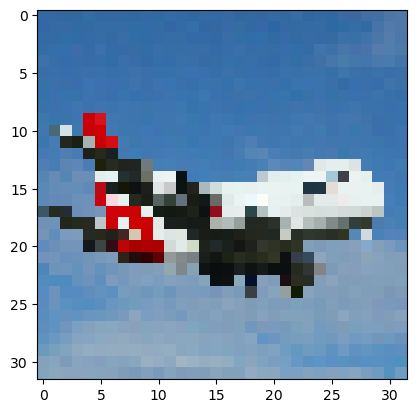

In [96]:
predict_class('images/testing_prediction_images/test.jpg',model_5)

1/1 [==============================] - 0s 27ms/step
[[1.20394705e-02 3.37303523e-03 8.97295177e-01 2.44246563e-03
  9.30346549e-04 7.79911876e-02 1.77926407e-03 5.29010955e-04
  4.51844098e-04 3.16825323e-03]]
dog
Top prediction of these image are
bird : 89.73
dog : 7.8
airplane : 1.2
The image given as input is


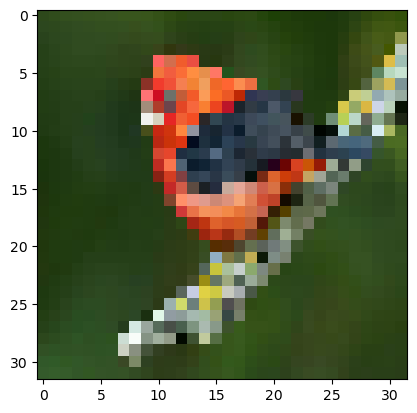

In [97]:
predict_class('images/testing_prediction_images/test2.jpg',model_5)

1/1 [==============================] - 0s 27ms/step
[[5.9027486e-03 3.5353911e-01 1.4723590e-06 1.8184528e-05 2.1974803e-07
  3.2466215e-07 5.8260790e-05 2.0072607e-06 1.2225466e-05 6.4046550e-01]]
automobile
Top prediction of these image are
truck : 64.05
automobile : 35.35
airplane : 0.59
The image given as input is


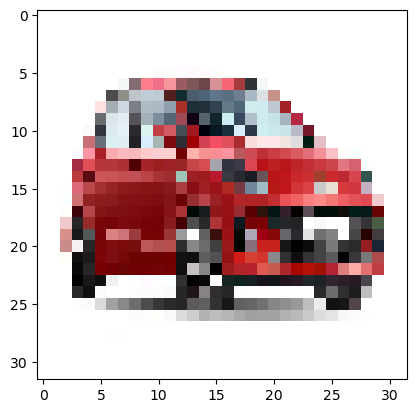

In [98]:
predict_class('images/testing_prediction_images/test3.jpg',model_5)